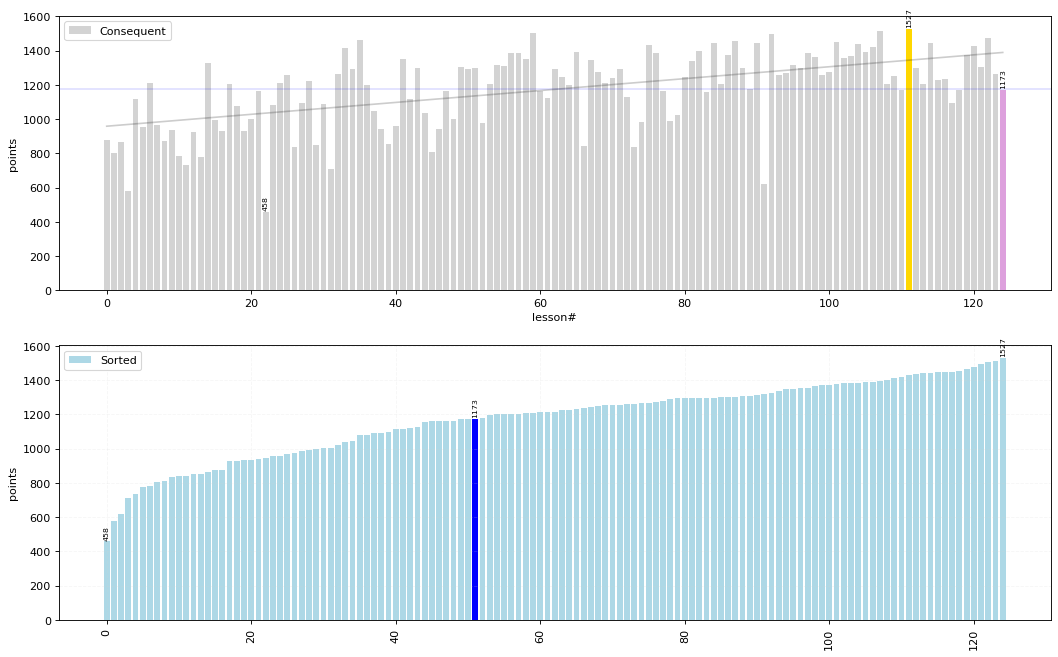

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# import data from existing leaning file with lesson sheet
lesson_df = pd.read_excel('dutch.xlsx', sheet_name='lesson')

# extraction necessary information only - date of lesson, # of lesson and finish and points
# known is for filtering new lessons and repeat lessons

data_words_lesson_df = lesson_df.loc[:, ['finish', 'points', 'known', 'r']]
data_words_lesson_df['date'] = data_words_lesson_df['finish'].apply(lambda x: x.strftime("%d.%m.%Y"))
conseq = data_words_lesson_df[data_words_lesson_df['known'] != 25]
conseq = conseq.reset_index()
sort = conseq.sort_values(by = 'points', ascending=True)
sort = sort.reset_index()

# index of the last lesson
last = conseq['r'].values[-1]
last_sort = sort.index[sort['r'] == last].tolist()[0]

# determine max points lesson
sort_max_pts = sort['points'].values[-1]
sort_min_pts = sort['points'].values[0]
max_pts_ind = sort.index[sort['points'] == sort_max_pts].tolist()[0]
min_pts_ind = sort.index[sort['points'] == sort_min_pts].tolist()[0]

max_pts_ind_con = conseq.index[conseq['points'] == sort_max_pts].tolist()[0]
min_pts_ind_con = conseq.index[conseq['points'] == sort_min_pts].tolist()[0]

# plotting results on a graph
plt.figure(figsize=(16, 10), dpi=80)
plt.get_current_fig_manager().set_window_title('Points graphs')


# create the first subplot
ax = plt.subplot(2, 1, 1)

# plot the first bar graph
#bar = ax.bar(range(len(conseq)), conseq['points'], color='blue')

for i, d in enumerate(conseq['points']):
    color = 'lightgrey'
    if i == last - 1:  # highlight the last bar
        color = 'plum'
    elif i == max_pts_ind_con:
        color = 'gold'
    ax.bar(i, d, color=color)

for i in range(len(conseq)):
    if i == max_pts_ind_con or i == min_pts_ind_con or i == (len(conseq) - 1):
        plt.text(x=i, y=conseq.loc[i, 'points'] + 10, s=conseq.loc[i, 'points'], ha='center', va='bottom', color = 'black', size = 7, rotation=90)

plt.legend(['Consequent'], loc="upper left")

# adding the average and trend line
plt.axhline(y=np.nanmean(conseq['points']), color='blue', linewidth=0.2, label='Avg')

x = np.array(range(len(conseq)))
y = np.poly1d(np.polyfit(x, conseq['points'], 1))(x)
ax.plot(x, y, color='black',alpha=.2) #linestyle='--'

plt.xlabel('lesson#')
plt.ylabel('points')

# create the second subplot
ax2 = plt.subplot(2, 1, 2)

# plot the second bar graph
for i, d in enumerate(sort['points']):
    color = 'lightblue'
    if i == last_sort:  # highlight the last lesson bar
        color = 'blue'
    ax2.bar(i, d, color=color)

for i in range(len(sort)):
    if i == max_pts_ind or i == min_pts_ind or i == last_sort:
        plt.text(x=i, y=sort.loc[i, 'points'] + 10, s=sort.loc[i, 'points'], ha='center', va='bottom', color = 'black', size = 7, rotation=90)    
    
#plt.bar(range(len(sort)), sort['points'], color='green')
plt.legend(['Sorted'], loc="upper left")

plt.grid(linestyle='--', color='lightgrey', alpha=.2)
plt.xticks(rotation=90)
plt.ylabel('points')

# show the plot
current_time = datetime.now().strftime("%d_%m_%Y")
plt.savefig(f'graph_{current_time}.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
df = lesson_df.copy()
#df['date'] = lesson_df['finish'].apply(lambda x: x.strftime("%d/%m/%y"))
#df['date'] = df['date'].astype('datetime64')

# convert the date column to a datetime format
#df['date'] = pd.to_datetime(df['date'])

# add a new column with the week number
df['week_number'] = df['finish'].dt.isocalendar().week

# show the resulting dataframe
#df

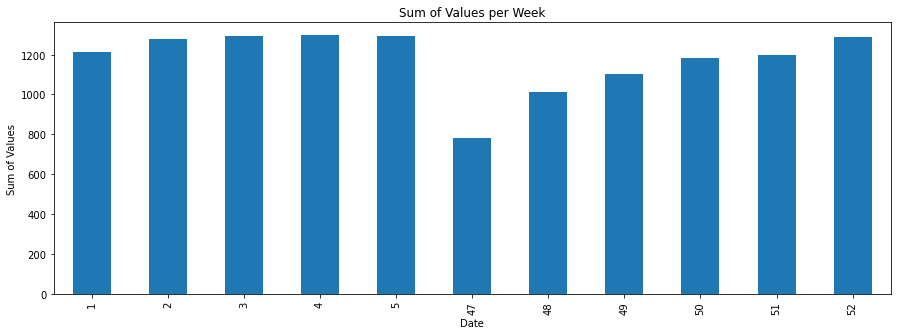

In [60]:
df_grouped = df.groupby('week_number').points.mean()

# create the bar plot
df_grouped.plot(kind='bar', figsize=(15,5))

# add title and labels
plt.title("Sum of Values per Week")
plt.xlabel("Date")
plt.ylabel("Sum of Values")

# show plot
plt.show()

In [31]:
writer = pd.ExcelWriter('/Users/aleksejgukov/Desktop/temp.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='sheet')
writer.save()

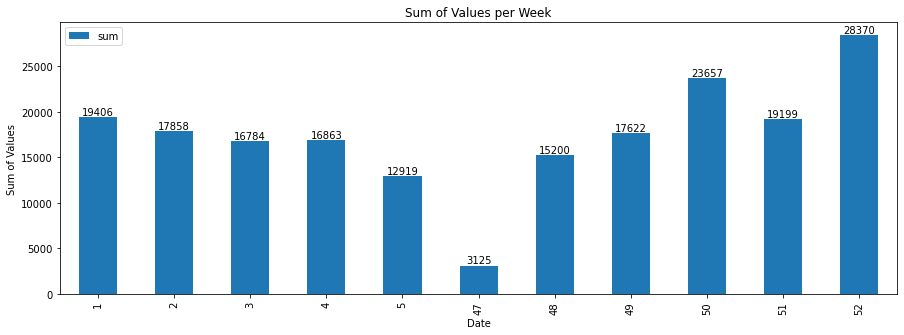

In [90]:
df_grouped = df.groupby(['week_number']).points.agg(['sum']) #len, min, max, sum, 

df_grouped.sort_values(by='week_number', inplace = True)

ax = df_grouped.plot(kind='bar', figsize=(15,5))

    
for i in ax.containers:
    ax.bar_label(i)
    
# add title and labels
plt.title("Sum of Values per Week")
plt.xlabel("Date")
plt.ylabel("Sum of Values")

# show plot
plt.show()

In [110]:
values = dict()
df = lesson_df.copy()
df['week_number'] = df['finish'].dt.isocalendar().week
df = df[df['r'] != 25]

for i in list(pd.unique(df['week_number'])):
    temp_df = df[df['week_number'] == i]
    values[i] = list(temp_df.points)

In [118]:
list(values.keys())

[47, 48, 49, 50, 51, 52, 1, 2, 3, 4, 5]

In [126]:
ks = list(values.keys())
ml = 0
for s in ks:
    l = len(values[s])
    if l > ml:
        ml = l

In [129]:
ax.containers

[<BarContainer object of 10 artists>]

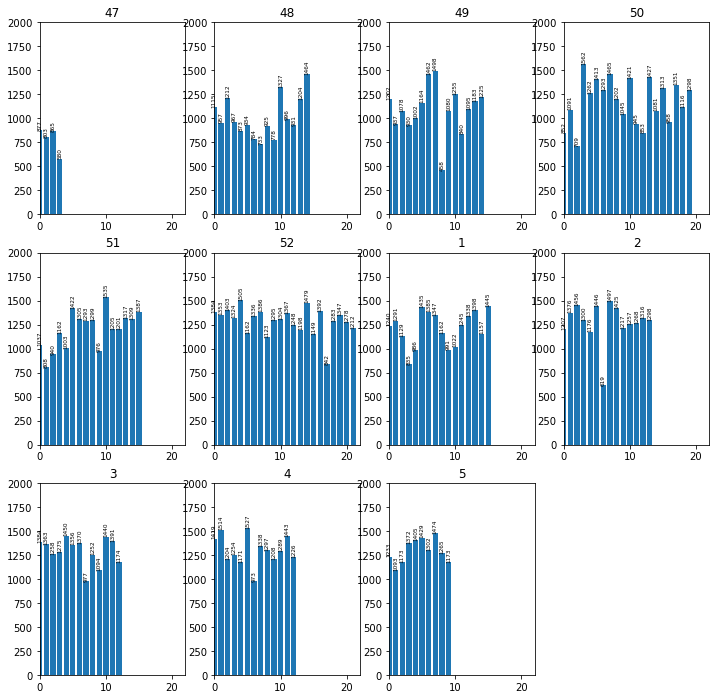

In [131]:
plt.figure(figsize=(12,12))
for i in range(3):
    for j in range(4):
        if i*4 + j < 11:
            ax = plt.subplot(3,4,i*4+j+1)
            plt.title(list(values.keys())[i*4+j])
            plt.bar(range(len(values[list(values.keys())[i*4+j]])), values[list(values.keys())[i*4+j]])
            for p in ax.containers:
                ax.bar_label(p, rotation=90, fontsize='xx-small')
            plt.ylim(0, 2000)
            plt.xlim(0, ml)
        else:
            break
current_time = datetime.now().strftime("%d_%m_%Y")
plt.savefig(f'weeks_{current_time}.png', dpi=300, bbox_inches='tight')

In [119]:
values[1]

[1240,
 1291,
 1129,
 835,
 986,
 1435,
 1385,
 1347,
 1162,
 991,
 1022,
 1245,
 1338,
 1398,
 1157,
 1445]